In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [18]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    
    return np.exp(-(H - mu)**2 / (2 * sigma**2))

second_prior = np.vectorize(gaussian_prior)


def third_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return (np.exp(-1000*H**2) + np.exp(-1000*(H - 1)**2))

third_prior = np.vectorize(third_prior)

### Bonus point

Why do we need to use np.vectorize here?

np.vectorize is essentialy a "for loop", but it makes the code cleaner. We used it so we can give an array like object as the input for a function, and the function will act on all the elements of the array and so it's like a vector!

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [19]:
H = np.linspace(0, 1, 1000, dtype=np.longdouble)

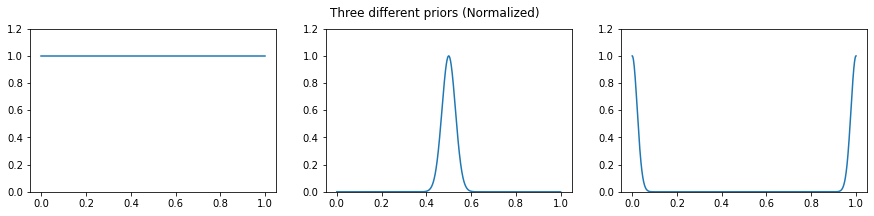

In [20]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.subplot(1,3,1)
plt.plot(H,first_prior(H))
plt.ylim([0,1.2])
plt.subplot(1,3,2)
plt.plot(H,second_prior(H))
plt.ylim([0,1.2])
plt.subplot(1,3,3)
plt.plot(H,third_prior(H))
plt.ylim([0,1.2])

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

A round-off error is the error that happens because the precision of the calculation is finite, so the calculation will be different than the exact value. Here the numbers are getting really small really fast, so it's important to keep the precision level as high as possible. That's why we would like to use float128 data type explicitly.
I use a windows machine so float128 is not defined for me! When I searched I found out that I could use "longdouble" instead, but I won't get the result I want, and the last 2 diagrams will be lost!

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [21]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [60]:
def posterior(data, n, H):
    ones = np.sum(data)
    zeros = len(data) - ones
    
    if n == 1:
        return first_prior(H) * H**ones * (1-H)**zeros / max(first_prior(H) * H**ones * (1-H)**zeros)
    
    if n == 2:
        return second_prior(H) * H**ones * (1-H)**zeros / max(second_prior(H) * H**ones * (1-H)**zeros)
    
    if n == 3:
        return third_prior(H) * H**ones * (1-H)**zeros / max(third_prior(H) * H**ones * (1-H)**zeros)
    


<ipython-input-60-301a49ea55d4>:6: RuntimeWarning: invalid value encountered in true_divide
  return first_prior(H) * H**ones * (1-H)**zeros / max(first_prior(H) * H**ones * (1-H)**zeros)
<ipython-input-60-301a49ea55d4>:9: RuntimeWarning: invalid value encountered in true_divide
  return second_prior(H) * H**ones * (1-H)**zeros / max(second_prior(H) * H**ones * (1-H)**zeros)
<ipython-input-60-301a49ea55d4>:12: RuntimeWarning: invalid value encountered in true_divide
  return third_prior(H) * H**ones * (1-H)**zeros / max(third_prior(H) * H**ones * (1-H)**zeros)
<ipython-input-60-301a49ea55d4>:6: RuntimeWarning: invalid value encountered in true_divide
  return first_prior(H) * H**ones * (1-H)**zeros / max(first_prior(H) * H**ones * (1-H)**zeros)
<ipython-input-60-301a49ea55d4>:9: RuntimeWarning: invalid value encountered in true_divide
  return second_prior(H) * H**ones * (1-H)**zeros / max(second_prior(H) * H**ones * (1-H)**zeros)
<ipython-input-60-301a49ea55d4>:12: RuntimeWarning: inv

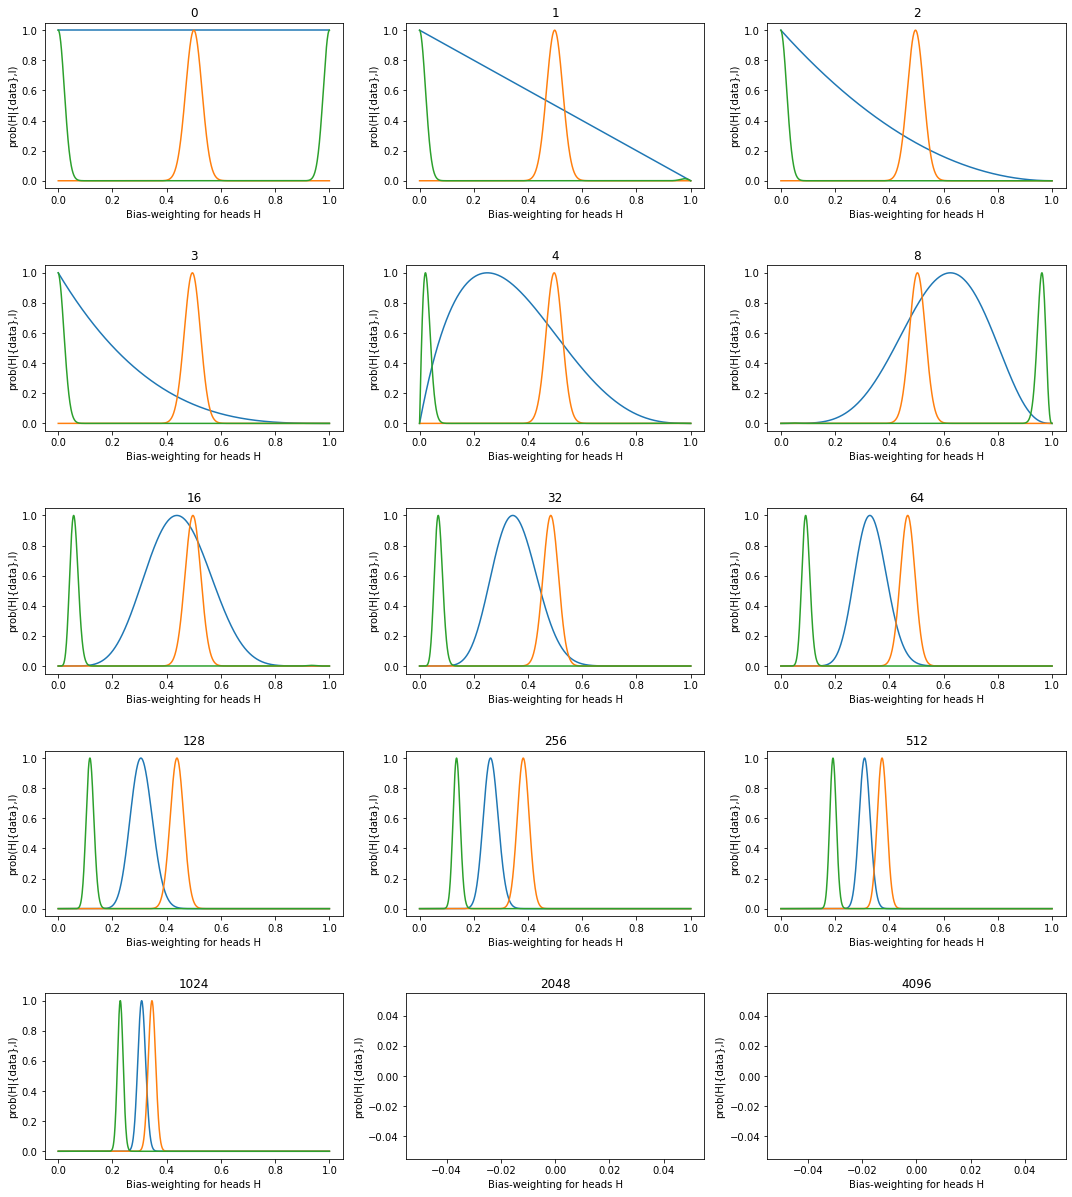

In [61]:
plt.figure(figsize = (15, 50))

for i in range(15):
    plt.subplot(15, 3, i+1)
    plt.xlabel("Bias-weighting for heads H")
    plt.ylabel("prob(H|{data},I)")
    
    if i < 4:
        plt.title(str(i))
    
    else:
        plt.title(str(2**(i-2)))
    
    for n in range(3):
        plt.plot(H, posterior(data[i], n+1, H))

plt.tight_layout(h_pad = 3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [62]:
import numpy as np
def n_th_raw_moment(data, n):   # data should be an array like object
    return np.sum(np.array(data)**n) / len(data)


## (b)

Write a function to calculate central moments of a given distribution

In [63]:
def n_th_central_moment(data, n):   # data should be an array like object
    return np.sum((np.array(data) - np.mean(data))**n) / len(data)

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [64]:
binomial = np.random.binomial(30, 0.7, 10**6)
poisson = np.random.poisson(2.1, 10**6)
gaussian = np.random.normal(2.1, 0.3, 10**6)

distros = [binomial, poisson, gaussian]
name = ['Binomial', 'Poisson', 'Gaussian']

for j in range(3):
    for i in range(3):
        print(name[j],i+1, '-th raw moment =', n_th_raw_moment(distros[j], i+1), 'and', i+1, '-th central moment =', n_th_central_moment(distros[j], i+1))

Binomial 1 -th raw moment = 20.998752 and 1 -th central moment = 3.5993252822663635e-16
Binomial 2 -th raw moment = 447.24886 and 2 -th central moment = 6.301274442496002
Binomial 3 -th raw moment = 1063.896148 and 3 -th central moment = -2.4749520265435243
Poisson 1 -th raw moment = 2.102541 and 1 -th central moment = -8.078870905592339e-17
Poisson 2 -th raw moment = 6.523053 and 2 -th central moment = 2.102374343318999
Poisson 3 -th raw moment = 24.652569 and 3 -th central moment = 2.0969261139744515
Gaussian 1 -th raw moment = 2.0999001308443943 and 1 -th central moment = 5.082867460259877e-17
Gaussian 2 -th raw moment = 4.499565086205521 and 2 -th central moment = 0.0899845266852189
Gaussian 3 -th raw moment = 9.82664143524734 and 3 -th central moment = 8.708326097443552e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [65]:
from scipy import stats

In [66]:
for j in range(3):
    for i in range(3):
        print(name[j],i+1, '-th scipy moment =', stats.moment(distros[j], i+1))
        
print('So scipy gives central moments!')

Binomial 1 -th scipy moment = 0.0
Binomial 2 -th scipy moment = 6.301274442496002
Binomial 3 -th scipy moment = -2.4749520265435243
Poisson 1 -th scipy moment = 0.0
Poisson 2 -th scipy moment = 2.102374343318999
Poisson 3 -th scipy moment = 2.096926113974452
Gaussian 1 -th scipy moment = 0.0
Gaussian 2 -th scipy moment = 0.0899845266852189
Gaussian 3 -th scipy moment = 8.708326097443555e-05
So scipy gives central moments!


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [67]:
from pandas import DataFrame, read_csv

In [68]:
data = np.loadtxt("data.txt")
Frame = DataFrame(data, columns = ["time passed","number of events"])
Frame

,time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [70]:
total = Frame['number of events'].sum()
print('Total number of decays:', total)
mean = Frame['number of events'].mean()
print('Average number of decays:', mean)

newFrame = Frame.append(DataFrame({"Total # of decays":[str(total)],"Average # of decays":[str(mean)]}))
newFrame

np.savetxt(r'new_data.txt', newFrame.values, fmt='%s')

Total number of decays: 485193.0
Average number of decays: 236.91064453125


## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.